# Lista 4- método de levi carregamento triangular

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import sympy as smp

In [8]:
x,y,a,b,p,wm,v,d,E,f,h,alfa,c1,c2,c3,c4 =smp.symbols('x y a b p wm v d E f h alfa c1,c2 c3 c4')
n=smp.symbols('n', int=True)

In [9]:
a=30
b=10
p=10
alfa=n*x*smp.pi/a
E=25000000
v=0.3
d=E*0.3**3/(12*(1-v**2))

### A solução particular foi cálculada manualmente e é dada por

In [10]:
#wp=-2*p*b**4/(d*smp.pi**5)*smp.summation(1/n**5*smp.sin(n*smp.pi*y/b),(n,1,3))
wp=-2*p*b**4/(d*smp.pi**5)*(1/n**5)
wp

-3.23555555555556/(pi**5*n**5)

#### Sabemos que a solução homogenea para a simetria de deslocamentos na direção x pode ser simplificada por:

#### A solução homogenea exata é dada por (foi retirado o termo dos somatorio e da solução em x para o procedimento de cálculo

In [5]:
wh=((c1*smp.cosh(alfa)+c2*alfa*smp.sinh(alfa)+c3*smp.sinh(alfa)+c4*alfa*smp.cosh(alfa)))
W=wh+wp
W

c1*cosh(pi*n*x/30) + pi*c2*n*x*sinh(pi*n*x/30)/30 + c3*sinh(pi*n*x/30) + pi*c4*n*x*cosh(pi*n*x/30)/30 - 3.23555555555556/(pi**5*n**5)

aplicando as condições de contorno de apoio em relação a y temos na solução homogenea temos:



In [6]:
w0=W.subs([(x,0)])
w0

c1 - 3.23555555555556/(pi**5*n**5)

In [7]:
dwdx2=smp.diff((smp.diff(W,x)),x)
dwdy2=smp.diff((smp.diff(W,y)),y)
mxh=(dwdx2+v*dwdy2)*d
myh=(dwdy2+v*dwdx2)*d
mxyh=(1-v)*(smp.diff((smp.diff(W,x)),y))

In [8]:
m0=mxh.subs([(x,0)])
m0

68.6813186813187*pi**2*c1*n**2 + 137.362637362637*pi**2*c2*n**2

In [9]:
mb=mxh.subs([(x,a)])
mb

68.6813186813187*pi**2*c1*n**2*cosh(pi*n) + 68.6813186813187*pi**3*c2*n**3*sinh(pi*n) + 137.362637362637*pi**2*c2*n**2*cosh(pi*n) + 68.6813186813187*pi**2*c3*n**2*sinh(pi*n) + 68.6813186813187*pi**3*c4*n**3*cosh(pi*n) + 137.362637362637*pi**2*c4*n**2*sinh(pi*n)

In [10]:
wb=W.subs([(x,a)])
wb

c1*cosh(pi*n) + pi*c2*n*sinh(pi*n) + c3*sinh(pi*n) + pi*c4*n*cosh(pi*n) - 3.23555555555556/(pi**5*n**5)

In [11]:
sol=smp.solve([wb,mb,m0,w0],[c1,c2,c3,c4])
C1=sol[c1]
C2=sol[c2]
C3=sol[c3]
C4=sol[c4]
sol

{c1: 0.0105730308095239/n**5,
 c2: -0.00528651540476194/n**5,
 c3: 0.0166080779586894/n**4 - 0.0166080779586894*cosh(3.14159265358979*n)**2/(n**4*sinh(3.14159265358979*n)**2) + 0.0166080779586894*cosh(3.14159265358979*n)/(n**4*sinh(3.14159265358979*n)**2) - 0.0105730308095239*cosh(3.14159265358979*n)/(n**5*sinh(3.14159265358979*n)) + 0.0105730308095239/(n**5*sinh(3.14159265358979*n)),
 c4: 0.00528651540476194*cosh(3.14159265358979*n)/(n**5*sinh(3.14159265358979*n)) - 0.00528651540476194/(n**5*sinh(3.14159265358979*n))}

In [12]:

wh=(C1*smp.cosh(alfa)+C2*alfa*smp.sinh(alfa)+C3*smp.sinh(alfa)+C4*alfa*smp.cosh(alfa))*smp.sin(smp.pi*n*y/b)
W=wh+wp*smp.sin(smp.pi*n*y/b)
W=smp.summation(W,(n,1,5))
W

(-0.000176217180158731*pi*x*sinh(pi*x/30) + 0.000161617998367281*pi*x*cosh(pi*x/30) - 0.00837813616111819*sinh(pi*x/30) + 0.0105730308095239*cosh(pi*x/30))*sin(pi*y/10) + (-1.10135737599207e-5*pi*x*sinh(pi*x/15) + 1.09725159964066e-5*pi*x*cosh(pi*x/15) - 0.000325313089637939*sinh(pi*x/15) + 0.000330407212797621*cosh(pi*x/15))*sin(pi*y/5) + (-2.17552074270039e-6*pi*x*sinh(pi*x/10) + 2.17516964408508e-6*pi*x*cosh(pi*x/10) - 4.34703052869379e-5*sinh(pi*x/10) + 4.35104148540076e-5*cosh(pi*x/10))*sin(3*pi*y/10) + (-6.88348359995045e-7*pi*x*sinh(2*pi*x/15) + 6.88343558999004e-7*pi*x*cosh(2*pi*x/15) - 1.03247009033463e-5*sinh(2*pi*x/15) + 1.03252253999256e-5*cosh(2*pi*x/15))*sin(2*pi*y/5) + (-2.8194748825397e-7*pi*x*sinh(pi*x/6) + 2.81947403274036e-7*pi*x*cosh(pi*x/6) - 3.38336083011952e-6*sinh(pi*x/6) + 3.38336985904764e-6*cosh(pi*x/6))*sin(pi*y/2) - 3.23555555555556*(sin(pi*y/10) + sin(pi*y/5)/32 + sin(3*pi*y/10)/243 + sin(2*pi*y/5)/1024 + sin(pi*y/2)/3125)/pi**5

In [13]:
W=smp.lambdify([x,y],W)

In [14]:
m1 = np.linspace(0,a,500)
m2 = np.linspace(0,b,500)
x1,y1=np.meshgrid(m1,m2)

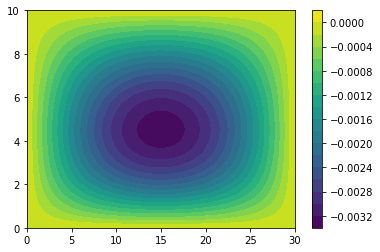

In [15]:
cont=plt.contourf(x1,y1,W(x1,y1),levels=20)
plt.colorbar()

In [16]:
W(12,10)


-3.3978587870291143e-19

In [17]:
d

61813.1868131868